In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.metrics import *

In [15]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''

# Which features are poppular now?

In [19]:
# Data import
year_df_raw = pd.read_csv('year_data.csv')

#--------------------------------------------------------------------------------------------------
year_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

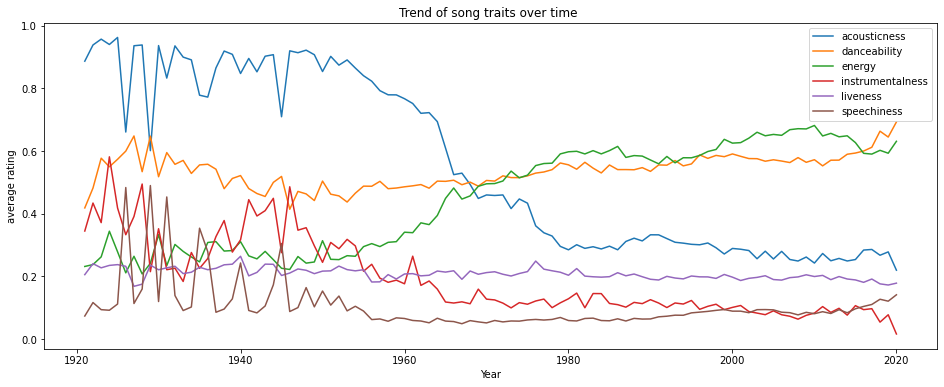

In [13]:
song_traits = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
               'speechiness']

plt.figure(figsize=(16,6))

for trait in song_traits:
    fig = sns.lineplot(data = year_df_raw, x='year', y=str(trait),
                       ci=None, label=str(trait), estimator='mean')



fig.title.set_text('Trend of song traits over time ')
fig.set(xlabel='Year', ylabel='average rating')

plt.show()

Even though it is not the same dataset we can still extrapolate our findings 
- Acousticness is now far less important 
- Dancibility on the rise 
- Energy rising over time 
- Speechiness rising 

# Data Import and cleaning 

In [23]:
# Data import
df_raw = pd.read_csv('SpotifyFeatures.csv')

#--------------------------------------------------------------------------------------------------
#pd.isnull(df_raw).sum()
df_raw.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


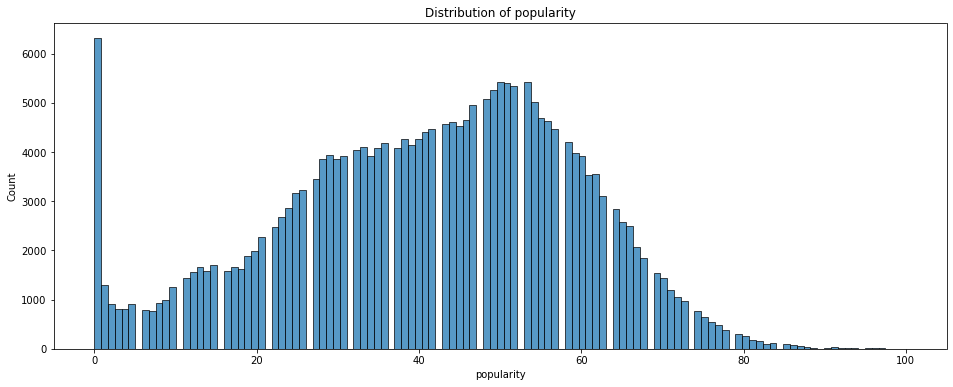

In [39]:
# Distribution of popularity
plt.figure(figsize=(16,6))
fig = sns.histplot(data = df_raw, x = 'popularity')


fig.title.set_text('Distribution of popularity')
plt.show()

I want to compare the how the top 50 songs are different to the 50-100 for each metric!
- Do double for loops to go through 